In [9]:
import numpy as np
import nibabel as nib 
from skimage import measure
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold= sys.maxsize)
np.set_printoptions(linewidth=np.inf)

In [10]:
mask_data = nib.load('data/output/output_0.nii.gz').get_fdata()

In [37]:
t1 = np.where(mask_data == 1,1,0 )
t2 = np.where(mask_data > 0, 1, 0)
t3 = np.where((mask_data == 3) | (mask_data == 1), 1, 0)

In [11]:
brain = nib.load('/Users/leebyeongju/Desktop/segmentation_GUI/data/BraTS20_Training_001_t1.nii').get_fdata()

In [36]:
mask_data[:,119,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

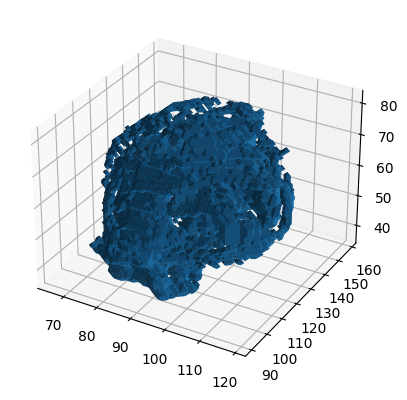

In [15]:
verts, faces, normals, values = measure.marching_cubes(t1, 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                linewidth=1, antialiased=True)
plt.show()

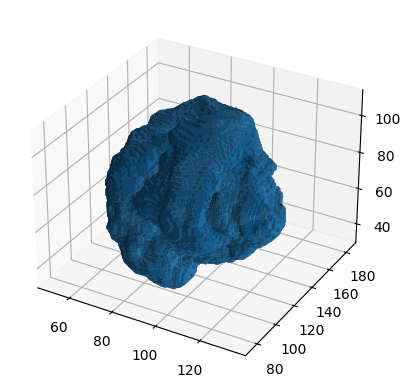

In [30]:
verts, faces, normals, values = measure.marching_cubes(t2, 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                linewidth=1, antialiased=True)
plt.show()

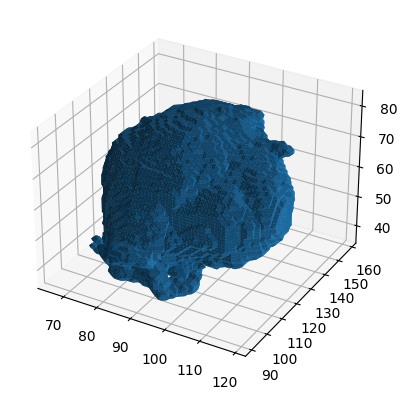

In [38]:
verts, faces, normals, values = measure.marching_cubes(t3, 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                linewidth=1, antialiased=True)
plt.show()

In [13]:
from skimage import measure

def save_obj(obj,path):
    verts, faces, normals, values = measure.marching_cubes(obj, 0)
    faces = faces + 1
    #obj 파일 만드는 코드
    thefile = open(path, 'w')
    for item in verts:
        thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

    for item in normals:
        thefile.write("vn {0} {1} {2}\n".format(item[0],item[1],item[2]))

    for item in faces:
        thefile.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))  

    thefile.close()

In [16]:
save_obj(t1,'/Users/leebyeongju/Desktop/segmentation visualize/data/output/t1.obj')

In [26]:
save_obj(t2,'/Users/leebyeongju/Desktop/segmentation visualize/data/output/t2.obj')

In [39]:
save_obj(t3,'/Users/leebyeongju/Desktop/segmentation visualize/data/output/t3.obj')

In [15]:
save_obj(brain,'data/output/brain.obj')

In [1]:
import vtk

def render():
    # Create a rendering window and renderer
    ren = vtk.vtkRenderer()
    renWin = vtk.vtkRenderWindow()
    renWin.AddRenderer(ren)
    # Create a RenderWindowInteractor to permit manipulating the camera
    iren = vtk.vtkRenderWindowInteractor()
    iren.SetRenderWindow(renWin)
    style = vtk.vtkInteractorStyleTrackballCamera()
    iren.SetInteractorStyle(style)

    stlFilename = "magnolia.stl"
    polydata = loadStl(stlFilename)
    ren.AddActor(polyDataToActor(polydata))
    ren.SetBackground(0.1, 0.1, 0.1)
    
    # enable user interface interactor
    iren.Initialize()
    renWin.Render()
    iren.Start()

def loadStl(fname):
    """Load the given STL file, and return a vtkPolyData object for it."""
    reader = vtk.vtkSTLReader()
    reader.SetFileName(fname)
    reader.Update()
    polydata = reader.GetOutput()
    return polydata

In [17]:
import sys
import pathlib
from pyglet import gl
import trimesh 
from trimesh.viewer.windowed import SceneViewerWidget
from PyQt5 import QtCore, QtOpenGL, Qt
here = pathlib.Path(__file__).resolve().parent

class ObjectSpace(object):
    """ Object space mocker """
    def __init__(self):
        # Textures and buffers scheduled for deletion the next time this
        # object space is active.
        self._doomed_textures = []
        self._doomed_buffers = []

class Context(object):
    """
    pyglet.gl.Context mocker. This is used to make pyglet believe that a valid
    context has already been setup. (Qt takes care of creating the open gl
    context)
    _Most of the methods are empty, there is just the minimum required to make
    it look like a duck..._
    """
    # define the same class attribute as pyglet.gl.Context
    CONTEXT_SHARE_NONE = None
    CONTEXT_SHARE_EXISTING = 1
    _gl_begin = False
    _info = None
    _workaround_checks = [
        ('_workaround_unpack_row_length',
         lambda info: info.get_renderer() == 'GDI Generic'),
        ('_workaround_vbo',
         lambda info: info.get_renderer().startswith('ATI Radeon X')),
        ('_workaround_vbo_finish',
         lambda info: ('ATI' in info.get_renderer() and
                       info.have_version(1, 5) and
                       sys.platform == 'darwin'))]
    _nscontext = None

    def __init__(self, context_share=None):
        """
        Setup workaround attr and object spaces (again to mock what is done in
        pyglet context)
        """
        self.object_space = ObjectSpace()
        for attr, check in self._workaround_checks:
            setattr(self, attr, None)

    def __repr__(self):
        return '%s()' % self.__class__.__name__

    def set_current(self):
        pass

    def destroy(self):
        pass

    def delete_texture(self, texture_id):
        pass

    def delete_buffer(self, buffer_id):
        pass

class QtViewerWidget(QtOpenGL.QGLWidget):
    """
    A simple widget for trimesh viewer.
    User can subclass this widget and implement the following methods:
        - on_init: called when open gl has been initialised
    """
    def __init__(self, model_path, parent=None, frame_time=32):
        """
        :param clear_color: The widget clear color
        :type clear_color: tuple(r, g, b, a)
        :param frame_time: The desired frame time [ms]
        :type: frame_time: int
        :param dt: The desired update rate [ms]
        :type: dt: int
        """
        QtOpenGL.QGLWidget.__init__(self, parent)

        # init members
        self.draw_timer = QtCore.QTimer()
        # configure draw and update timers
        self.draw_timer.setInterval(frame_time)
        self.draw_timer.timeout.connect(self.updateGL)
        # start timers
        self.draw_timer.start()
        self.model_path = model_path

    def initializeGL(self):
        """
        Initialises open gl:
            - create a mock context to fool pyglet
            - setup various opengl rule (only the clear color atm)
        """
        gl.current_context = Context()
        self.on_init()

    def on_init(self):
        """
        Lets the user initialise himself
        """
        self.w, self.h = 400, 300
        self.setMinimumSize(self.w, self.h)
        # self.setBaseSize(self.w, self.h)
        self.setSizePolicy(Qt.QSizePolicy.Expanding, Qt.QSizePolicy.Expanding)
        m = trimesh.load(self.model_path, process=False)
        scene = trimesh.Scene()
        scene.add_geometry(m)
        self.viewer = SceneViewerWidget(scene)
 
    def mousePressEvent(self, event):
        _buttons = 0
        if event.button() == QtCore.Qt.LeftButton:
            _buttons = 1
        elif event.button() == QtCore.Qt.RightButton:
            _buttons = 4
        elif event.button() == QtCore.Qt.MidButton:
            _buttons = 2
        _modifiers = 0
        if event.modifiers() & QtCore.Qt.ShiftModifier:
            _modifiers |= 1
        if event.modifiers() & QtCore.Qt.ControlModifier:
            _modifiers |= 2
        self.viewer.on_mouse_press(event.x(), event.y(), _buttons, _modifiers)

    def mouseMoveEvent(self, event) -> None:
        self.viewer.on_mouse_drag(event.x(), event.y())

    def wheelEvent(self, event) -> None:
        self.viewer.on_mouse_scroll(0, event.angleDelta().y() / 120)

    def resizeGL(self, w, h):
        self.viewer.on_resize(w, h)

    def paintGL(self):
        self.viewer.on_draw()

def main():
    app = Qt.QApplication(sys.argv)
    window = Qt.QMainWindow()
    widget = QtViewerWidget(str(here / 'data/output/t4.obj'))
    window.setCentralWidget(widget)
    window.show()
    app.exec_()

if __name__ == "__main__":
    main()

ImportError: `trimesh.viewer.windowed` requires `pip install "pyglet<2"`

In [29]:
pip install pyglet==1.5.6


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.0
    Uninstalling pyglet-1.5.0:
      Successfully uninstalled pyglet-1.5.0
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip uninstall pyglet

Found existing installation: pyglet 1.5.0
Uninstalling pyglet-1.5.0:
  Would remove:
    /Users/leebyeongju/opt/anaconda3/envs/vis/lib/python3.10/site-packages/pyglet-1.5.0.dist-info/*
    /Users/leebyeongju/opt/anaconda3/envs/vis/lib/python3.10/site-packages/pyglet/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [31]:
pyglet.version

'2.0.4'

In [32]:
import pyglet

In [12]:
import open3d as o3d
import open3d.visualization as vis
import numpy as np

sphere = o3d.geometry.TriangleMesh.create_sphere(1.0)
sphere.compute_vertex_normals()
sphere.translate(np.array([0, 0, -3.5]))
box = o3d.io.read_triangle_mesh('data/output/t3.obj')

mat_sphere = vis.rendering.MaterialRecord()
mat_sphere.shader = 'defaultLit'
mat_sphere.base_color = [0.8, 0, 0, 1.0]

mat_box = vis.rendering.MaterialRecord()

mat_box.base_color = [0.467, 0.467, 0.467,1.0]
mat_box.base_roughness = 0.4
mat_box.base_reflectance = 0.0
mat_box.base_clearcoat = 1.0
mat_box.thickness = 1.0
mat_box.transmission = 1.0
mat_box.absorption_distance = 10
mat_box.absorption_color = [0.5, 0.5, 0.5]

geoms = [{'name': 'sphere', 'geometry': sphere, 'material': mat_sphere},
         {'name': 'box', 'geometry': box, 'material': mat_box}]
vis.draw(geoms)

In [6]:
import pyvista
from pyvista import examples
filename = '/Users/leebyeongju/Desktop/segmentation_GUI/data/output/t2.obj'
reader = pyvista.get_reader(filename)
mesh = reader.read()
mesh.plot()

Widget(value="<iframe src='http://localhost:60526/index.html?ui=P_0x7f9fa93e3f70_2&reconnect=auto' style='widt…

In [26]:
import pyvista
from pyvista import examples
filename = '/Users/leebyeongju/Desktop/segmentation_GUI/data/output/brain.obj'
reader = pyvista.get_reader(filename)
mesh = reader.read()


reader = pyvista.get_reader('data/output/t2.obj')
t2= reader.read()
p = pyvista.Plotter()

reader = pyvista.get_reader('data/output/t1.obj')
t1= reader.read()

reader = pyvista.get_reader('data/output/t3.obj')
t3= reader.read()


p.add_mesh(mesh, opacity = 0.8, color = 'pink')
p.add_mesh(t2, opacity = 0.76, color = 'red')
p.add_mesh(t1, opacity = 0.99, color = 'blue')
p.show()

Widget(value="<iframe src='http://localhost:60526/index.html?ui=P_0x7f9fa892bf10_13&reconnect=auto' style='wid…

In [ ]:
import sys
from qtpy import QtWidgets
from qtpy.QtWidgets import QMainWindow
import numpy as np
import pyvista as pv
from pyvistaqt import QtInteractor

class MainWindow(QMainWindow):
    
    def __init__(self, parent=None, show=True):
        QtWidgets.QMainWindow.__init__(self, parent)

        # create the frame
        self.frame = QtWidgets.QFrame()
        vlayout = QtWidgets.QVBoxLayout()

        # add the pyvista interactor object
        self.plotter = QtInteractor(self.frame)
        

In [ ]:
import pyvista
from pyvista import examples
filename = '/Users/leebyeongju/Desktop/segmentation_GUI/data/output/t2.obj'
reader = pyvista.get_reader(filename)
mesh = reader.read()
mesh.plot()

In [4]:
pip install trame

     |████████████████████████████████| 339 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 708 kB 79.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 78.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 79.3 MB/s eta 0:00:01
     |████████████████████████████████| 179 kB 60.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 221 kB 161.2 MB/s eta 0:00:01
     |████████████████████████████████| 447 kB 108.4 MB/s eta 0:00:01
     |████████████████████████████████| 110 kB 91.2 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 12.1 MB 58.2 MB/s eta 0:00:01
     |████████████████████████████████| 360 kB 72.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 23.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pyvista import examples
mesh = examples.download_notch_stress()
mesh.plot(scalars='Nodal Stress', component=0, cmap='turbo', cpos='xy')

Widget(value="<iframe src='http://localhost:60526/index.html?ui=P_0x7f9fa89185e0_1&reconnect=auto' style='widt…

In [2]:
matplotlib.__version__

'3.6.0'

In [20]:
import matplotlib.pyplot as plt

In [1]:
import matplotlib

In [25]:
pip install matplotlib==3.6.0

     |████████████████████████████████| 7.3 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 49.2 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys

# Setting the Qt bindings for QtPy
import os
os.environ["QT_API"] = "pyqt5"

from qtpy import QtWidgets

import numpy as np

import pyvista as pv
from pyvistaqt import QtInteractor, MainWindow

class MyMainWindow(MainWindow):

    def __init__(self, parent=None, show=True):
        QtWidgets.QMainWindow.__init__(self, parent)

        # create the frame
        self.frame = QtWidgets.QFrame()
        vlayout = QtWidgets.QVBoxLayout()

        # add the pyvista interactor object
        self.plotter = QtInteractor(self.frame)
        vlayout.addWidget(self.plotter.interactor)
        self.signal_close.connect(self.plotter.close)

        self.frame.setLayout(vlayout)
        self.setCentralWidget(self.frame)

        # simple menu to demo functions
        mainMenu = self.menuBar()
        fileMenu = mainMenu.addMenu('File')
        exitButton = QtWidgets.QAction('Exit', self)
        exitButton.setShortcut('Ctrl+Q')
        exitButton.triggered.connect(self.close)
        fileMenu.addAction(exitButton)

        # allow adding a sphere
        meshMenu = mainMenu.addMenu('Mesh')
        self.add_sphere_action = QtWidgets.QAction('Add Sphere', self)
        self.add_sphere_action.triggered.connect(self.add_sphere)
        meshMenu.addAction(self.add_sphere_action)

        if show:
            self.show()

    def add_sphere(self):
        """ add a sphere to the pyqt frame """
        sphere = pv.Sphere()
        self.plotter.add_mesh(sphere, show_edges=True)
        self.plotter.reset_camera()


if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    window = MyMainWindow()
    sys.exit(app.exec_())

SystemExit: 0

/Users/leebyeongju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [28]:
pip install pyvistaqt

     |████████████████████████████████| 130 kB 5.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
